In [6]:

## Import Libraries:
# Mathematical / Numerical Libraries:
import numpy as np
import random

# Plotting:
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib inline  # use %matplotlib tk to get a popout window, requires PyQt5

# Type hinting:
from typing import List, Union, Tuple, Callable

# make numpy warnings act as errors:
np.seterr(all='raise')

import os
import sys

sys.path.append(f"{os.getcwd()}/..")  # hacky way to import library that exists in parent directory

In [7]:
from BuildYourOwnEmbedding import curves
from BuildYourOwnEmbedding.parameters import UniformRange, RandomRange

In [8]:
# one method to set latin modern math font:
if False:
    import matplotlib.font_manager as fm
    fontPath = 'latinmodern-math.otf'

    fm.fontManager.addfont(fontPath)

    prop = fm.FontProperties(fname=fontPath)
    matplotlib.rc('font', family='sans-serif') 
    matplotlib.rcParams.update({
        'font.size': 12,
        'font.sans-serif': prop.get_name(),
    })

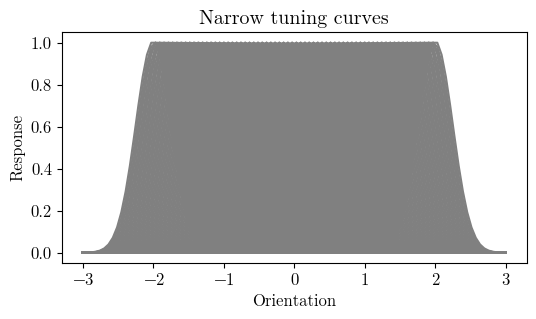

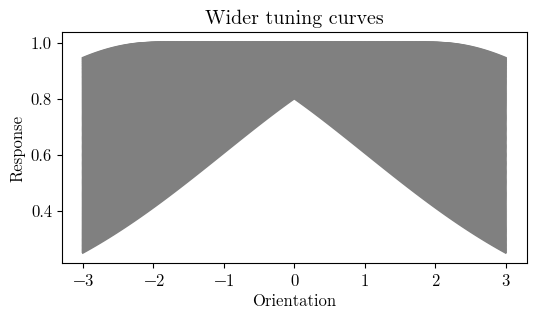

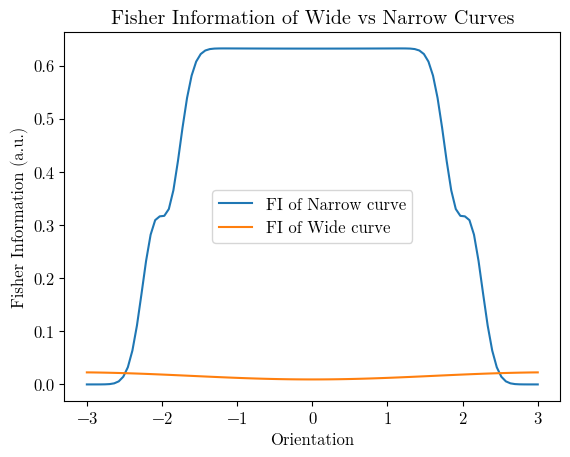

In [14]:

x = np.linspace(-3, 3, 100)
n = 200
narrowCurves = curves.generate_random_gaussian_curves(
    x = x,
    mu = UniformRange(minVal=-2, maxVal=2, n=n),
    sigma = 0.25,
    minResponse = 0,
    maxResponse = 1
)

wideCurves = curves.generate_random_gaussian_curves(
    x = x,
    mu = UniformRange(minVal=-2, maxVal=2, n=n),
    sigma = 3,
    minResponse = 0,
    maxResponse = 1
)

# def calculate_fisher_information(tuning_curves):
#     fi_values = []
#     for i in range(len(tuning_curves)):
#         derivative = np.gradient(tuning_curves[i])
#         fisher_information = np.sum(derivative**2)
#         fi_values.append(fisher_information)
#     return fi_values

def calculate_fisher_information(tuning_curves):
    fi_values = np.zeros(tuning_curves[0].shape)
    for i in range(len(tuning_curves)):
        derivative = np.gradient(tuning_curves[i])
        fisher_information = derivative**2
        fi_values += fisher_information
    return fi_values


# plot the curves:
fig: plt.Figure = plt.figure(figsize=(6,3))
for curve in narrowCurves:
    plt.plot(x, curve, color="gray")
plt.xlabel(r"Orientation")
plt.ylabel(r"Response")
plt.title(r"Narrow tuning curves")
plt.show()
fig: plt.Figure = plt.figure(figsize=(6,3))
for curve in wideCurves:
    plt.plot(x, curve, color="gray")
plt.xlabel(r"Orientation")
plt.ylabel(r"Response")
plt.title(r"Wider tuning curves")
plt.show()


# Calculate the Fisher Information for the list of tuning curves
narrowFI = calculate_fisher_information(narrowCurves)
wideFI = calculate_fisher_information(wideCurves)

plt.title("Fisher Information of Wide vs Narrow Curves")
plt.plot(x, narrowFI, label='FI of Narrow curve')
plt.plot(x, wideFI, label='FI of Wide curve')
plt.xlabel(r"Orientation")
plt.ylabel(r"Fisher Information (a.u.)")
plt.legend()
# plt.ylim([0,1])
plt.show()